# Firstly, the data needs to be read in to establish the format of the data

To begin with, the neccesary packages are imported

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

Next, the data is read into a pandas dataframe

In [232]:
df = pd.read_csv("../data/player_stats-27-01-2023.csv")
print(f"Data Shape is {df.shape}")
df.sample(10)

Data Shape is (67, 16)


,player,overall_kd,hp_kills_per_10,hp_kd,hp_dmg_per_10,avg_hp_hill_time,hp_maps_played,snd_kill_per_round,snd_kd_rate,snd_first_blood_rate,snd_maps_played,control_kills_per_10,control_kd,control_dmg_per_10,control_maps_played,map_1_3_average_kills
1,HyDra,1.17,24.4,1.20,2772,46.0,26,0.70,0.97,13.60%,19,21.3,1.18,2509,15,54.5
63,Spart,0.80,16.8,0.71,2355,64.2,11,0.61,0.86,7.60%,9,16.4,0.94,2111,7,37.6
3,Gismo,1.14,25.3,1.26,2897,69.2,6,0.82,1.06,13.30%,5,18.0,0.97,2396,3,51.7
52,Assault,0.92,17.7,0.88,2374,55.9,11,0.82,1.35,11.80%,9,14.3,0.83,1933,6,43.2
29,Simp,0.99,21.0,0.97,2618,70.2,22,0.74,1.11,17.30%,18,18.7,1.00,2373,13,51.5
2,Scrappy,1.16,23.5,1.08,2877,72.1,25,0.79,1.17,11.30%,17,20.6,1.32,2458,14,56.1
30,Dashy,0.99,19.0,0.95,2574,67.3,16,0.69,1.09,9.30%,13,14.2,1.01,1950,9,43.0
39,Nero,0.96,22.2,0.96,2691,54.8,17,0.60,0.83,9.00%,13,20.1,0.99,2520,9,48.4
57,Vikul,0.89,20.3,0.88,2522,62.4,22,0.70,1.06,12.20%,16,15.5,0.84,1958,12,47.3
36,SlasheR,0.97,19.8,0.94,2436,53.6,22,0.59,0.94,9.90%,18,17.0,1.04,2221,13,46.0


Next, I will check the data for any nulls

In [244]:
print(f"There are {df.isna().sum().sum()} nulls in the dataset")

There are 0 nulls in the dataset


In [245]:
print(f"The datsets columns are {df.columns.values}")

The datsets columns are ['player' 'overall_kd' 'hp_kills_per_10' 'hp_kd' 'hp_dmg_per_10'
 'avg_hp_hill_time' 'hp_maps_played' 'snd_kill_per_round' 'snd_kd_rate'
 'snd_first_blood_rate' 'snd_maps_played' 'control_kills_per_10'
 'control_kd' 'control_dmg_per_10' 'control_maps_played'
 'map_1_3_average_kills' 'scaled']


It is useful to remove players who have a small number of maps played as it isn't a strong representation
of long term performance

In [235]:
df['hp_maps_played'].value_counts().sort_index(ascending=True)

2      6
4      4
5      1
6      5
11     5
13     2
14     1
15     1
16     3
17     5
18     2
21     1
22    12
23     3
24     4
25     8
26     4
Name: hp_maps_played, dtype: int64

After using this data for matches played in hardpoints, I have decided to remove anyone with less than 10 maps in hardpoint.
This is being done under the assumption that players will still have a decent number of maps played in other gamemodes

In [236]:
df = df[df['hp_maps_played'] >= 10]
df.reset_index(drop=True, inplace=True)
df['hp_maps_played'].value_counts().sort_index(ascending=True)

11     5
13     2
14     1
15     1
16     3
17     5
18     2
21     1
22    12
23     3
24     4
25     8
26     4
Name: hp_maps_played, dtype: int64

In [237]:
df['snd_maps_played'].value_counts().sort_index(ascending=True)

9      5
11     2
12     2
13     6
14     3
15     9
16     4
17     4
18     4
19    12
Name: snd_maps_played, dtype: int64

In [238]:
df['control_maps_played'].value_counts().sort_index(ascending=True)

6      3
7      2
8      4
9      4
10     6
11     1
12     4
13    15
14     8
15     4
Name: control_maps_played, dtype: int64

After removing players with <10 hardpoint maps played, the minimum number of maps played in one gamemode is 6 (control)

In [239]:
df[df['control_maps_played'] < 7]

,player,overall_kd,hp_kills_per_10,hp_kd,hp_dmg_per_10,avg_hp_hill_time,hp_maps_played,snd_kill_per_round,snd_kd_rate,snd_first_blood_rate,snd_maps_played,control_kills_per_10,control_kd,control_dmg_per_10,control_maps_played,map_1_3_average_kills
39,JoeDeceives,0.93,22.1,1.03,2605,86.5,11,0.57,0.78,13.20%,9,16.7,0.83,2113,6,49.3
42,Assault,0.92,17.7,0.88,2374,55.9,11,0.82,1.35,11.80%,9,14.3,0.83,1933,6,43.2
48,Exceed,0.86,20.6,0.94,2368,60.2,11,0.63,0.87,13.20%,9,15.8,0.72,2102,6,46.5


These appear to be players who have recently been added to the LAG roster, after being promoted from the academy team (recent as of 27/01/2023)
I feel like they haven't played 6 control maps as they haven't played 6 series in stage 2???
This inaccuracy may be a result of challengers stats being counted. To increase the depth of the data however, they will still be included

To determine if my scaled data is accuracte in showing that a player is high in both categories, I need to look at the raw data

In [240]:
df['scaled'] = ((df['hp_kills_per_10']/df['hp_kills_per_10'].mean())+(df['avg_hp_hill_time']/df['avg_hp_hill_time'].mean()))/2
df[['player', 'hp_kills_per_10', 'avg_hp_hill_time', 'scaled']].sort_values(by='scaled').style.background_gradient(cmap='coolwarm')

,player,hp_kills_per_10,avg_hp_hill_time,scaled
34,MajorManiak,17.700000,44.100000,0.782170
49,Neptune,20.500000,37.800000,0.796338
9,Temp,22.400000,36.000000,0.826378
38,Havok,19.500000,44.500000,0.828003
26,Arcitys,20.400000,44.800000,0.851744
0,Cellium,21.500000,43.000000,0.862881
42,Assault,17.700000,55.900000,0.879552
40,Kenny,21.400000,45.600000,0.881975
16,Asim,24.200000,38.300000,0.887891
47,Clayster,20.700000,49.200000,0.895145


Looking at this, it is clear that the scaled data is succesfuly determining what players have a high average between both statlines.
Some outcomes include:
- Accuracy has low kills per ten minutes but makes up for it in hill time
- JoeDeceives has the highest 'impact' in terms of having high hill time and kills per ten minutes
- MajorManiak has the lowest, with low kills per ten minutes and lower hill time


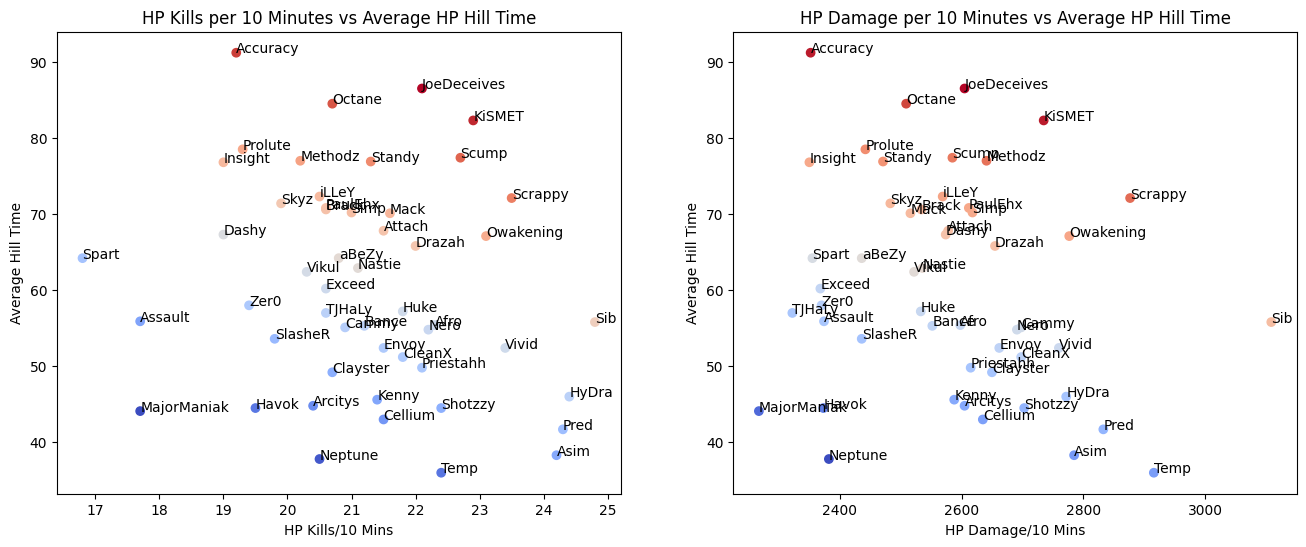

In [252]:
#Create function to plot scatter graphs comparing two numerical columns
#It weight them by multiplying both columns
#This leads to higher values being red and lower columns being blue
#Colours don't neccesarily correlate to good or bad
#This is dependent on the data in the inputted columns

def scatter_comparison(axis: plt.Axes, title: str , xcol: str, ycol: str, xlabel: str, ylabel: str,
    show_min_max: bool = True, player_col: np.array = None, show_all_players: bool = False):
    """
    axis: the axis to draw the plot on
    title: The title of the plot
    xcol: the column to use as the x values in the plot
    ycol: the column to use for y values
    xlabel:
    ylabel:
    show_min_max: whether or not to plot the player names of the min and max players (from scaled data)
    player_col: column containing player names
    """
    #Scale the data
    #The scale is based on what percentage of the mean value a value makes up
    #This is then averaged between the two datapoints
    scaled_weight = ((xcol/xcol.mean())+(ycol/ycol.mean()))/2
    axis.scatter(x=xcol, y=ycol, c=scaled_weight, cmap='coolwarm')
    axis.set_title(title)
    axis.set_xlabel(xlabel)
    axis.set_ylabel(ylabel)
    if show_all_players:
        for i in range(len(player_col)):
            axis.text(x=xcol[i], y=ycol[i], s=player_col[i])
    if show_min_max:
        min_player_index = (scaled_weight).argmin()
        min_player = player_col[min_player_index]
        axis.text(s=min_player, x=xcol[min_player_index], y=ycol[min_player_index])

        max_player_index = (scaled_weight).argmax()
        max_player = player_col[max_player_index]
        axis.text(s=max_player, x=xcol[max_player_index], y=ycol[max_player_index])

fig = plt.figure(figsize=(16, 6))
ax1, ax2 = fig.subplots(ncols=2, sharey=False)
scatter_comparison(ax1, "HP Kills per 10 Minutes vs Average HP Hill Time", df['hp_kills_per_10'], df['avg_hp_hill_time'],
                "HP Kills/10 Mins", "Average Hill Time", False, df['player'], True)
scatter_comparison(ax2, "HP Damage per 10 Minutes vs Average HP Hill Time", df['hp_dmg_per_10'], df['avg_hp_hill_time'],
                "HP Damage/10 Mins", "Average Hill Time", False, df['player'], True)
  

